# Extracting Data from NBA API

Years: 2007 and beyond.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [110]:
from nba_api.stats.endpoints import playercareerstats

In [111]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [112]:
# initialize empty dataframe to be appended to with selenium below
df = pd.DataFrame(columns=['Player','Salary','Year'])
df

,Player,Salary,Year


**Note:** Install ChromeDriver

In [113]:
# location of chrome webdriver on local computer
# driver = webdriver.Chrome('/Users/bpfalz/Downloads/chromedriver')
# 
# # loops through each season available on website (1990-91 season to 2018-19 season)
# for yr in range(2019,2024):
#     page_num = str(yr) + '-' + str(yr+1) +'/'
#     url = 'https://hoopshype.com/salaries/players/' + page_num
#     driver.get(url)
#     
#     players = driver.find_elements_by_xpath('//td[@class="name"]') # location on website of each element of player name
#     salaries = driver.find_elements_by_xpath('//td[@class="hh-salaries-sorted"]') # location ob website of each element of player salary
#     
#     players_list = []
#     for p in range(len(players)):
#         players_list.append(players[p].text)
#     
#     salaries_list = []
#     for s in range(len(salaries)):
#         salaries_list.append(salaries[s].text)
#     
#     data_tuples = list(zip(players_list[1:],salaries_list[1:])) # list of each players name and salary paired together
#     temp_df = pd.DataFrame(data_tuples, columns=['Player','Salary']) # creates dataframe of each tuple in list
#     temp_df['Year']=yr # adds season beginning year to each dataframe
#     df=df.append(temp_df) # appends to master dataframe
#     
# driver.close()

In [114]:
playercareerstats.PlayerCareerStats(player_id='203999').get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203999,2015-16,00,1610612743,DEN,21.0,80,55,1733.0,307,...,0.811,181,379,560,189,79,50,104,208,796
1,203999,2016-17,00,1610612743,DEN,22.0,73,59,2038.0,494,...,0.825,212,506,718,359,61,55,171,214,1221
2,203999,2017-18,00,1610612743,DEN,23.0,75,73,2443.0,504,...,0.850,195,608,803,458,90,61,210,212,1385
3,203999,2018-19,00,1610612743,DEN,24.0,80,80,2504.0,616,...,0.821,228,637,865,580,108,55,248,228,1604
4,203999,2019-20,00,1610612743,DEN,25.0,73,73,2335.0,565,...,0.817,166,545,711,512,85,44,226,222,1456
5,203999,2020-21,00,1610612743,DEN,26.0,72,72,2488.0,732,...,0.868,205,575,780,599,95,48,222,192,1898
6,203999,2021-22,00,1610612743,DEN,27.0,74,74,2476.0,764,...,0.810,206,813,1019,584,109,63,281,191,2004
7,203999,2022-23,00,1610612743,DEN,28.0,69,69,2323.0,646,...,0.822,167,650,817,678,87,47,247,174,1690
8,203999,2023-24,00,1610612743,DEN,29.0,79,79,2737.0,822,...,0.817,223,753,976,708,108,68,237,194,2085


In [115]:
from nba_api.stats.endpoints import drafthistory
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import playerindex
from nba_api.stats.endpoints import playerawards
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import teaminfocommon
from nba_api.stats.static import teams
from nba_api.stats.static import players

# Extracting Australian NBA Players:

In [116]:
players_df = playerindex.PlayerIndex(league_id="00", season="2008").get_data_frames()[0]

# Getting all players and their index from 2008-2024:
for i in range(2009, 2025, 1):
    players_df = players_df.append(playerindex.PlayerIndex(league_id="00", season=str(i)).get_data_frames()[0])

australian_players = players_df[(players_df['COUNTRY'] == "Australia") & (players_df['TEAM_ID'] != 0)].drop_duplicates(subset = ['PERSON_ID']).reset_index(drop = True).sort_values(by="FROM_YEAR")
australian_player_ids = list(australian_players['PERSON_ID'].values)

all_player_ids = list(players_df['PERSON_ID'].values)

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/1783808914.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_df = players_df.append(playerindex.PlayerIndex(league_id="00", season=str(i)).get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/1783808914.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_df = players_df.append(playerindex.PlayerIndex(league_id="00", season=str(i)).get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/1783808914.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_df = players_df.append(playerindex.PlayerIndex(league_id="00", season=str(i)).get_data_frames()[0])
/var/folders/wp/b15fgf414

In [117]:
australian_players

,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,FROM_YEAR,TO_YEAR,PTS,REB,AST,STATS_TIMEFRAME
4,101106,Bogut,Andrew,andrew-bogut,1610612744,warriors,0,Golden State,Warriors,GSW,...,2005.0,1.0,1.0,1.0,2005,2018,3.5,5.0,1.0,Season
0,201605,Jawai,Nathan,nathan-jawai,1610612750,timberwolves,0,Minnesota,Timberwolves,MIN,...,2008.0,2.0,41.0,1.0,2008,2009,3.2,2.7,0.6,Season
1,2431,Andersen,David,david-andersen,1610612740,hornets,0,New Orleans,Hornets,NOH,...,2002.0,2.0,36.0,1.0,2009,2010,3.4,2.1,0.3,Season
21,201988,Mills,Patty,patty-mills,1610612748,heat,0,Miami,Heat,MIA,...,2009.0,2.0,55.0,1.0,2009,2024,4.0,1.1,1.1,Season
19,202681,Irving,Kyrie,kyrie-irving,1610612742,mavericks,0,Dallas,Mavericks,DAL,...,2011.0,1.0,1.0,1.0,2011,2024,25.6,5.0,5.2,Season
9,203382,Baynes,Aron,aron-baynes,1610612761,raptors,0,Toronto,Raptors,TOR,...,NaN,NaN,NaN,1.0,2012,2020,6.1,5.2,0.9,Season
11,203521,Dellavedova,Matthew,matthew-dellavedova,1610612758,kings,0,Sacramento,Kings,SAC,...,NaN,NaN,NaN,1.0,2013,2022,1.5,0.4,1.3,Season
14,203957,Exum,Dante,dante-exum,1610612742,mavericks,0,Dallas,Mavericks,DAL,...,2014.0,1.0,5.0,1.0,2014,2024,7.8,2.7,2.9,Season
2,203946,Bairstow,Cameron,cameron-bairstow,1610612741,bulls,0,Chicago,Bulls,CHI,...,2014.0,2.0,49.0,1.0,2014,2015,1.9,1.6,0.3,Season
18,204060,Ingles,Joe,joe-ingles,1610612753,magic,0,Orlando,Magic,ORL,...,NaN,NaN,NaN,1.0,2014,2024,4.4,2.1,3.0,Season


### Visualisation 1: Lollipop Chart showing top 10 NBA producing Domestic Leagues

In [118]:
draft_history = drafthistory.DraftHistory(league_id='00').get_data_frames()[0]

In [173]:
draft_countries = draft_history[(draft_history['SEASON'] >='2008') & (draft_history['ORGANIZATION_TYPE'] == "Other Team/Club") & (~draft_history['ORGANIZATION'].str.contains("G League")) & (~draft_history['ORGANIZATION'].str.contains("D-League")) & (~draft_history['ORGANIZATION'].str.contains("IBL"))]

# Extract country from the organisation
draft_countries['ORGANIZATION'] = draft_countries['ORGANIZATION'].str.extract(r'\(([^)]+)\)')

# Keep only top ten draft countries:
top_ten = draft_countries.groupby('ORGANIZATION').size()
top_ten = list(top_ten.nlargest(10).index)
draft_countries = draft_countries[draft_countries['ORGANIZATION'].isin(top_ten)]

# Keep only Season and Organization
draft_countries_cum = draft_countries[['SEASON', 'ORGANIZATION']].reset_index(drop = True).groupby(['SEASON', 'ORGANIZATION']).size().reset_index().rename(columns = {0: "Number of Players"})
draft_countries_cum['SEASON'] = draft_countries_cum['SEASON'].astype(int)

# For years where there are no players drafted, insert 0
years = range(2008, 2025)

all_years = pd.DataFrame([(org, year) for org in draft_countries['ORGANIZATION'].unique() for year in years],
                         columns=['ORGANIZATION', 'SEASON'])

draft_countries_cum = pd.merge(all_years, draft_countries_cum, how = "left").fillna({'Number of Players': 0})
draft_countries_cum['Cumulative Players'] = draft_countries_cum.groupby('ORGANIZATION')['Number of Players'].cumsum()
draft_countries_cum

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/768293027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_countries['ORGANIZATION'] = draft_countries['ORGANIZATION'].str.extract(r'\(([^)]+)\)')


,ORGANIZATION,SEASON,Number of Players,Cumulative Players
0,France,2008,2.0,2.0
1,France,2009,2.0,4.0
2,France,2010,2.0,6.0
3,France,2011,0.0,6.0
4,France,2012,1.0,7.0
...,...,...,...,...
165,Croatia,2020,0.0,6.0
166,Croatia,2021,0.0,6.0
167,Croatia,2022,0.0,6.0
168,Croatia,2023,0.0,6.0


In [184]:
draft_countries_static = draft_countries_cum[draft_countries_cum['SEASON'] == 2024].reset_index(drop = True)[['ORGANIZATION', 'SEASON', 'Cumulative Players']]

draft_countries_static.head()

,ORGANIZATION,SEASON,Cumulative Players
0,France,2024,26.0
1,Australia,2024,10.0
2,Serbia,2024,24.0
3,Germany,2024,8.0
4,Spain,2024,35.0


In [181]:
# draft_countries_cum.to_csv('tab_data/draft_countries_cum.csv', index=False)
# draft_countries_static.to_csv('tab_data/draft_countries_static.csv', index=False)

### Visualisation 2: Conference of NBA Players (East vs West)

In [201]:
aus_player_stats = playercareerstats.PlayerCareerStats(player_id=australian_player_ids[0], per_mode36="PerGame").get_data_frames()[0]

for id in australian_player_ids[1:]:
    aus_player_stats = aus_player_stats.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0])

aus_player_stats = aus_player_stats[(aus_player_stats['TEAM_ID'] != 0)]

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/596507944.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aus_player_stats = aus_player_stats.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/596507944.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aus_player_stats = aus_player_stats.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/596507944.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aus_player_stats = aus_player_stats.append(playercareerstats.PlayerCareerStats

In [202]:
# Australian Player Statistics
aus_player_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,101106,2005-06,00,1610612749,MIL,21.0,82,77,28.6,3.9,...,0.629,2.3,4.7,7.0,2.3,0.6,0.8,1.5,3.2,9.4
1,101106,2006-07,00,1610612749,MIL,22.0,66,66,34.2,5.3,...,0.577,2.5,6.3,8.8,3.0,0.7,0.5,2.3,3.3,12.3
2,101106,2007-08,00,1610612749,MIL,23.0,78,78,34.9,6.0,...,0.587,3.1,6.6,9.8,2.6,0.8,1.7,2.2,3.3,14.3
3,101106,2008-09,00,1610612749,MIL,24.0,36,33,31.2,5.1,...,0.571,3.3,7.0,10.3,2.0,0.6,1.0,2.4,3.6,11.7
4,101106,2009-10,00,1610612749,MIL,25.0,69,69,32.3,6.9,...,0.629,3.0,7.1,10.2,1.8,0.6,2.5,1.9,3.2,15.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1631298,2022-23,00,1610612743,DEN,25.0,17,0,3.9,0.5,...,0.667,0.4,0.6,1.0,0.2,0.2,0.1,0.1,0.5,1.2
1,1631298,2023-24,00,1610612763,MEM,26.0,4,0,15.9,0.5,...,0.000,1.0,2.0,3.0,0.3,1.0,0.3,0.5,0.8,1.5
0,1630700,2022-23,00,1610612740,NOP,20.0,59,11,17.7,1.5,...,0.650,0.6,2.6,3.2,2.3,0.7,0.2,1.0,1.7,3.8
1,1630700,2023-24,00,1610612740,NOP,21.0,61,16,22.3,2.3,...,0.642,1.0,2.9,3.9,2.7,1.4,0.4,1.0,1.7,5.8


In [14]:
aus_team_ids = list(aus_player_stats['TEAM_ID'].unique())

# Obtaining a dataframe of team_id and team_conference
aus_team_conference = list()
for id in aus_team_ids:
    aus_team_conference.append(teaminfocommon.TeamInfoCommon(league_id="00", team_id=id).get_data_frames()[0]['TEAM_CONFERENCE'].values[0])

team_conference = pd.DataFrame(
    {
        "TEAM_ID": aus_team_ids,
        "TEAM_CONFERENCE": aus_team_conference
    }
)

In [15]:
# Join the above two tables to get Australian players team conference by year:
aus_player_conference = aus_player_stats.merge(team_conference, how = "inner", on = "TEAM_ID")

In [16]:
# Obtain the season as the second year:
season_val = '20' + aus_player_conference['SEASON_ID'].str[-2:]
aus_player_conference['SEASON_ID'] = season_val
aus_player_conference_names = aus_player_conference.rename(columns={'SEASON_ID': 'YEAR'})[['YEAR', 'TEAM_CONFERENCE']]

In [17]:
aus_player_conference_counts = aus_player_conference_names.groupby(['YEAR', 'TEAM_CONFERENCE']).size().reset_index().rename(columns = {0: "Number of Players"})

In [18]:
aus_player_conference_counts.head()

,YEAR,TEAM_CONFERENCE,Number of Players
0,2006,East,1
1,2007,East,1
2,2008,East,1
3,2009,East,2
4,2010,East,1


### Visualisation 3: Australian Player Games Played

In [329]:
# Obtain the season as the second year:
aus_player_salaries = aus_player_stats
season_val = '20' + aus_player_salaries['SEASON_ID'].str[-2:]
aus_player_salaries['SEASON_ID'] = season_val
aus_player_salaries = aus_player_salaries.rename(columns={'SEASON_ID': 'YEAR'})


In [330]:
all_player_data = pd.DataFrame(players.get_players())[['id', 'full_name', 'is_active']]

In [331]:
player_games_played = aus_player_salaries.merge(all_player_data, how = 'inner', left_on='PLAYER_ID', right_on='id')[['full_name', 'PLAYER_AGE', 'GP', 'GS', 'is_active']].rename(columns={"full_name":"PLAYER_NAME"})
player_games_played['GP'] = player_games_played['GP'].astype(int)
player_games_played['GS'] = player_games_played['GS'].astype(int)
player_games_played['PLAYER_AGE'] = player_games_played['PLAYER_AGE'].astype(int)

player_games_played.head()

,PLAYER_NAME,PLAYER_AGE,GP,GS,is_active
0,Andrew Bogut,21,82,77,False
1,Andrew Bogut,22,66,66,False
2,Andrew Bogut,23,78,78,False
3,Andrew Bogut,24,36,33,False
4,Andrew Bogut,25,69,69,False


In [332]:
# Account for player having same age twice (i.e. change of teams) during a season:
player_games_played = player_games_played.groupby(['PLAYER_NAME', 'PLAYER_AGE'], as_index=False).agg({'GP': 'sum', 'GS': 'sum'})

In [333]:
# Obtain cumulative sum of games played and points
player_games_played = player_games_played.sort_values(by=['PLAYER_NAME', 'PLAYER_AGE'])

player_games_played['CUM_GAMES_PLAYED'] = player_games_played.groupby(['PLAYER_NAME'])['GP'].cumsum()
player_games_played['CUM_GAMES_STARTED'] = player_games_played.groupby(['PLAYER_NAME'])['GS'].cumsum()

player_games_played.head()

,PLAYER_NAME,PLAYER_AGE,GP,GS,CUM_GAMES_PLAYED,CUM_GAMES_STARTED
0,Andrew Bogut,21,82,77,82,77
1,Andrew Bogut,22,66,66,148,143
2,Andrew Bogut,23,78,78,226,221
3,Andrew Bogut,24,36,33,262,254
4,Andrew Bogut,25,69,69,331,323


In [334]:
player_games_played

,PLAYER_NAME,PLAYER_AGE,GP,GS,CUM_GAMES_PLAYED,CUM_GAMES_STARTED
0,Andrew Bogut,21,82,77,82,77
1,Andrew Bogut,22,66,66,148,143
2,Andrew Bogut,23,78,78,226,221
3,Andrew Bogut,24,36,33,262,254
4,Andrew Bogut,25,69,69,331,323
...,...,...,...,...,...,...
106,Patty Mills,34,40,2,860,107
107,Patty Mills,35,32,5,892,112
108,Ryan Broekhoff,28,42,0,42,0
109,Ryan Broekhoff,29,17,1,59,1


In [335]:
# Define the starting age
start_age = 19

# Process each player to ensure cumulative values start from age 19
result = pd.DataFrame()

for player in player_games_played['PLAYER_NAME'].unique():
    # Get the subset for the player
    player_data = player_games_played[player_games_played['PLAYER_NAME'] == player].copy()
    
    # Determine the first age present in the player's data
    first_actual_age = player_data['PLAYER_AGE'].min()
    
    # Create a DataFrame for the missing ages from start_age to first_actual_age - 1
    missing_ages = pd.DataFrame({
        'PLAYER_NAME': player,
        'PLAYER_AGE': list(range(start_age, first_actual_age)),
        'GP': 0,
        'GS': 0
    })
    
    # Combine the missing ages with the player's actual data
    player_data = pd.concat([missing_ages, player_data]).sort_values(by='PLAYER_AGE')
    
    # Calculate the cumulative sum
    player_data['CUM_GAMES_PLAYED'] = player_data['GP'].cumsum()
    player_data['CUM_GAMES_STARTED'] = player_data['GS'].cumsum()
    
    # Append to the result DataFrame
    result = pd.concat([result, player_data])

# Sort the final DataFrame by PLAYER_NAME and AGE
player_games_played_final = result.sort_values(by=['PLAYER_NAME', 'PLAYER_AGE']).reset_index(drop=True)

# Display the result DataFrame
player_games_played_final.head()

,PLAYER_NAME,PLAYER_AGE,GP,GS,CUM_GAMES_PLAYED,CUM_GAMES_STARTED
0,Andrew Bogut,19.0,0,0,0,0
1,Andrew Bogut,20.0,0,0,0,0
2,Andrew Bogut,21.0,82,77,82,77
3,Andrew Bogut,22.0,66,66,148,143
4,Andrew Bogut,23.0,78,78,226,221


In [336]:
# player_games_played_final.to_csv("tab_data/player_games_played_final.csv")

In [337]:
active_players = player_games_played_final.groupby(['PLAYER_NAME']).agg({'CUM_GAMES_PLAYED': 'max'}).reset_index().sort_values(by = "CUM_GAMES_PLAYED")
active_players = active_players.merge(all_player_data, how = 'inner', left_on='PLAYER_NAME', right_on='full_name').sort_values(['is_active'])
active_players.head()

,PLAYER_NAME,CUM_GAMES_PLAYED,id,full_name,is_active
0,Mangok Mathiang,4,1628493,Mangok Mathiang,False
1,Mitchell Creek,5,1628249,Mitchell Creek,False
2,Isaac Humphries,5,1629353,Isaac Humphries,False
3,Xavier Cooks,10,1641645,Xavier Cooks,False
19,Andrew Bogut,706,101106,Andrew Bogut,False


In [394]:
active_players

,PLAYER_NAME,CUM_GAMES_PLAYED,id,full_name,is_active
0,Mangok Mathiang,4,1628493,Mangok Mathiang,False
1,Mitchell Creek,5,1628249,Mitchell Creek,False
2,Isaac Humphries,5,1629353,Isaac Humphries,False
3,Xavier Cooks,10,1641645,Xavier Cooks,False
19,Andrew Bogut,706,101106,Andrew Bogut,False
5,Cameron Bairstow,36,203946,Cameron Bairstow,False
6,Nathan Jawai,45,201605,Nathan Jawai,False
7,Jonah Bolden,51,1628413,Jonah Bolden,False
8,Ryan Broekhoff,59,1629151,Ryan Broekhoff,False
9,David Andersen,103,2431,David Andersen,False


In [19]:
# aus_player_conference_counts.to_csv("tab_data/conference_counts.csv")

### Visualisation 4: Player Career Stats Radar Chart

In [20]:
player_names = pd.DataFrame(players.get_players())[['id', 'full_name']]

In [21]:
aus_player_stats_names = aus_player_stats

# Obtain player name
aus_player_stats_names = aus_player_stats_names.merge(player_names, how = "inner", left_on = "PLAYER_ID", right_on = "id").rename(columns = {"full_name": "FULL_NAME"})

# Obtain the season as the second year:
season_val = '20' + aus_player_stats_names['SEASON_ID'].str[-2:]
aus_player_stats_names['SEASON_ID'] = season_val
aus_player_stats_names = aus_player_stats_names.rename(columns={'SEASON_ID': 'YEAR'})

# Obtain relevant columns
aus_player_stats_names = aus_player_stats_names[['FULL_NAME', 'YEAR', 'GP', 'GS', 'PTS', 'REB', 'AST', 'STL', 'BLK']]

In [22]:
# Initialize an empty dictionary to track seen years for each player
seen_years = {}

# Function to calculate the counter
def year_counter(row):
    player = row['FULL_NAME']
    year = row['YEAR']
    
    if player not in seen_years:
        seen_years[player] = set()
    
    if year in seen_years[player]:
        return 0
    else:
        seen_years[player].add(year)
        return 1

# Apply the function to each row to create the counter column
aus_player_stats_names['SEASONS_PLAYED'] = aus_player_stats_names.apply(year_counter, axis=1)


In [23]:
# Calculate total points, rbs, asts etc...
aus_player_stats_names['TOTAL_PTS'] = aus_player_stats_names['PTS'] * aus_player_stats_names['GP']
aus_player_stats_names['TOTAL_REB'] = aus_player_stats_names['REB'] * aus_player_stats_names['GP']
aus_player_stats_names['TOTAL_AST'] = aus_player_stats_names['AST'] * aus_player_stats_names['GP']
aus_player_stats_names['TOTAL_STL'] = aus_player_stats_names['STL'] * aus_player_stats_names['GP']
aus_player_stats_names['TOTAL_BLK'] = aus_player_stats_names['BLK'] * aus_player_stats_names['GP']

# Group by player names
grouped = aus_player_stats_names.groupby(['FULL_NAME'])

# Sum total points, total steals, and total games played for each player
career_stats = grouped[['TOTAL_PTS', 'TOTAL_REB', 'TOTAL_AST', 'TOTAL_STL', 'TOTAL_BLK', 'GP', 'GS']].sum()

# Calculate the total number of seasons played for each player
career_stats['SEASONS_PLAYED'] = grouped['SEASONS_PLAYED'].sum()

# Calculate per season averages
career_stats['Season Points'] = career_stats['TOTAL_PTS'] / career_stats['SEASONS_PLAYED']
career_stats['Season Rebounds'] = career_stats['TOTAL_REB'] / career_stats['SEASONS_PLAYED']
career_stats['Season Assists'] = career_stats['TOTAL_AST'] / career_stats['SEASONS_PLAYED']
career_stats['Season Steals'] = career_stats['TOTAL_STL'] / career_stats['SEASONS_PLAYED']
career_stats['Season Blocks'] = career_stats['TOTAL_BLK'] / career_stats['SEASONS_PLAYED']
career_stats['Season Games Played'] = career_stats['GP'] / career_stats['SEASONS_PLAYED']
career_stats['Season Games Started'] = career_stats['GS'] / career_stats['SEASONS_PLAYED']

career_stats = career_stats[['Season Points', 'Season Rebounds', 'Season Assists', 'Season Steals', 'Season Blocks', 'Season Games Played', 'Season Games Started']].reset_index()

In [24]:
career_stats.head()

,FULL_NAME,Season Points,Season Rebounds,Season Assists,Season Steals,Season Blocks,Season Games Played,Season Games Started
0,Andrew Bogut,486.514286,436.900000,110.328571,31.478571,77.092857,50.428571,47.214286
1,Aron Baynes,346.655556,265.411111,45.588889,12.633333,27.255556,58.000000,18.666667
2,Ben Simmons,793.400000,432.766667,411.733333,87.900000,39.883333,55.333333,53.333333
3,Cameron Bairstow,22.500000,18.000000,3.600000,1.800000,2.700000,18.000000,1.500000
4,Dante Exum,259.485714,84.228571,96.357143,17.300000,7.614286,42.857143,12.714286


In [25]:
career_stats['Average Points Per Season'] = career_stats['Season Points'].rank(ascending=True, method='min')
career_stats['Average Rebounds Per Season'] = career_stats['Season Rebounds'].rank(ascending=True, method='min')
career_stats['Average Assists Per Season'] = career_stats['Season Assists'].rank(ascending=True, method='min')
career_stats['Average Steals Per Season'] = career_stats['Season Steals'].rank(ascending=True, method='min')
career_stats['Average Blocks Per Season'] = career_stats['Season Blocks'].rank(ascending=True, method='min')
career_stats['Average Games Played Per Season'] = career_stats['Season Games Played'].rank(ascending=True, method='min')
career_stats['Average Games Started Per Season'] = career_stats['Season Games Started'].rank(ascending=True, method='min')

In [26]:
# Initialize the MinMaxScaler - Could try StandardScaler
# scaler = MinMaxScaler()
# 
# # Columns to scale
# columns_to_scale = ['PER_SEASON_PTS', 'PER_SEASON_REB', 'PER_SEASON_AST', 'PER_SEASON_STL', 'PER_SEASON_BLK', 'PER_SEASON_GP', 'PER_SEASON_GS']
# new_column_names = ['PER_SEASON_PTS_SCALED', 'PER_SEASON_REB_SCALED', 'PER_SEASON_AST_SCALED', 'PER_SEASON_STL_SCALED', 'PER_SEASON_BLK_SCALED', 'PER_SEASON_GP_SCALED', 'PER_SEASON_GS_SCALED']
# 
# # Apply the scaler to these columns
# career_stats[new_column_names] = scaler.fit_transform(career_stats[columns_to_scale])

In [27]:
career_stats.head()

,FULL_NAME,Season Points,Season Rebounds,Season Assists,Season Steals,Season Blocks,Season Games Played,Season Games Started,Average Points Per Season,Average Rebounds Per Season,Average Assists Per Season,Average Steals Per Season,Average Blocks Per Season,Average Games Played Per Season,Average Games Started Per Season
0,Andrew Bogut,486.514286,436.900000,110.328571,31.478571,77.092857,50.428571,47.214286,17.0,21.0,15.0,15.0,22.0,11.0,19.0
1,Aron Baynes,346.655556,265.411111,45.588889,12.633333,27.255556,58.000000,18.666667,15.0,19.0,11.0,11.0,19.0,17.0,17.0
2,Ben Simmons,793.400000,432.766667,411.733333,87.900000,39.883333,55.333333,53.333333,20.0,20.0,22.0,22.0,21.0,14.0,20.0
3,Cameron Bairstow,22.500000,18.000000,3.600000,1.800000,2.700000,18.000000,1.500000,5.0,5.0,4.0,3.0,6.0,6.0,9.0
4,Dante Exum,259.485714,84.228571,96.357143,17.300000,7.614286,42.857143,12.714286,11.0,9.0,14.0,13.0,11.0,10.0,14.0


In [28]:
# Divide Career_stats into two separate dataframes:
# career_stats_normal = career_stats[['FULL_NAME', 'PER_SEASON_PTS', 'PER_SEASON_REB', 'PER_SEASON_AST', 'PER_SEASON_STL', 'PER_SEASON_BLK', 'PER_SEASON_GP', 'PER_SEASON_GS']]
# career_stats_scaled = career_stats[['FULL_NAME', 'PER_SEASON_PTS_SCALED', 'PER_SEASON_REB_SCALED', 'PER_SEASON_AST_SCALED', 'PER_SEASON_STL_SCALED', 'PER_SEASON_BLK_SCALED', 'PER_SEASON_GP_SCALED', 'PER_SEASON_GS_SCALED']]

career_stats_rank = career_stats[['FULL_NAME', 'Average Points Per Season', 'Average Rebounds Per Season', 'Average Assists Per Season', 'Average Steals Per Season', 'Average Blocks Per Season', 'Average Games Played Per Season', 'Average Games Started Per Season']]
career_stats_normal = career_stats[['FULL_NAME', 'Season Points', 'Season Rebounds', 'Season Assists', 'Season Steals', 'Season Blocks', 'Season Games Played', 'Season Games Started']]

In [29]:
career_stats_normal_long = pd.melt(
    career_stats_normal,
    id_vars=['FULL_NAME'],  # Columns to keep as-is
    var_name='NormalAttributes',  # Name for the new 'variable' column
    value_name='NormalValues'  # Name for the new 'value' column
)

career_stats_rank_long = pd.melt(
    career_stats_rank,
    id_vars=['FULL_NAME'],
    var_name='RankAttributes',
    value_name='RankValues'
)

In [30]:
# career_stats_normal_long.to_csv("tab_data/player_career_stats_normal.csv")
# career_stats_rank_long.to_csv("tab_data/player_career_stats_rank.csv")

### Visualisation 5: Observing the number of Active NBA Players from each country over time (2008-2024):

In [31]:
# Reading in all_player_stats:
all_player_stats = pd.read_csv('misc_data/all_player_stats.csv')
all_player_stats_2 = pd.read_csv('misc_data/all_player_stats_2.csv')
all_player_stats_3 = pd.read_csv('misc_data/all_player_stats_3.csv')
all_player_stats_4 = pd.read_csv('misc_data/all_player_stats_4.csv')

# Appending dataframes:
all_player_stats_final = pd.concat([all_player_stats, all_player_stats_2, all_player_stats_3, all_player_stats_4], ignore_index=True, axis = 0)

In [32]:
# Obtain all NBA players and their respective country
all_player_countries = players_df[['PERSON_ID', 'PLAYER_LAST_NAME', 'PLAYER_FIRST_NAME', 'COUNTRY']].drop_duplicates()

In [33]:
# Join all_player_stats_final and all_player_countries to get dataframe that
# contains all player seasons (2008-2024) and their country
player_season_country = all_player_stats_final.merge(all_player_countries, how = "inner", left_on="PLAYER_ID", right_on="PERSON_ID")
player_season_country = player_season_country[['PLAYER_ID', 'PLAYER_LAST_NAME', 'PLAYER_FIRST_NAME', 'COUNTRY', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'PTS', 'AST', 'REB', 'STL', 'BLK']]

In [34]:
# Filter for only seasons 2008 and beyond:
player_season_country = player_season_country[player_season_country['SEASON_ID'] >= "2007"]

# Obtain the season as the second year:
season_val = '20' + player_season_country['SEASON_ID'].str[-2:]
player_season_country['SEASON_ID'] = season_val
player_season_country = player_season_country.rename(columns={'SEASON_ID': 'YEAR'})

In [35]:
player_season_country.head()

,PLAYER_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,COUNTRY,YEAR,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,PTS,AST,REB,STL,BLK
3,2668,Davis,Josh,USA,2012,1610612763,MEM,31.0,15,0,8.7,1.9,0.4,1.8,0.5,0.1
7,2668,Davis,Josh,USA,2012,1610612763,MEM,31.0,15,0,8.7,1.9,0.4,1.8,0.5,0.1
13,2109,Gill,Eddie,USA,2008,1610612751,NJN,29.0,13,1,11.4,2.9,1.6,1.7,0.5,0.2
14,2109,Gill,Eddie,USA,2009,1610612749,MIL,30.0,6,0,7.2,2.3,1.8,0.7,0.5,0.2
20,2109,Gill,Eddie,USA,2008,1610612751,NJN,29.0,13,1,11.4,2.9,1.6,1.7,0.5,0.2


In [36]:
country_number_active_players = player_season_country.groupby(['YEAR', 'COUNTRY']).size().reset_index().rename(columns = {0: 'Number of Players'})

In [37]:
aus_number_players = country_number_active_players[(country_number_active_players['COUNTRY'] == 'Australia')]

In [38]:
# Excluding USA
avg_number_players = country_number_active_players.mean().values[1]

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/2539250445.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_number_players = country_number_active_players.mean().values[1]


In [39]:
aus_number_players['Average Number of Players'] = round(avg_number_players, 2)

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/96243941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_number_players['Average Number of Players'] = round(avg_number_players, 2)


In [40]:
aus_number_players

,YEAR,COUNTRY,Number of Players,Average Number of Players
1,2008,Australia,1,18.5
34,2009,Australia,2,18.5
70,2010,Australia,5,18.5
108,2011,Australia,4,18.5
149,2012,Australia,5,18.5
190,2013,Australia,6,18.5
228,2014,Australia,7,18.5
267,2015,Australia,12,18.5
305,2016,Australia,10,18.5
343,2017,Australia,11,18.5


In [41]:
aus_number_players['Difference From Average'] = aus_number_players['Number of Players'] - aus_number_players['Average Number of Players']
aus_number_players['YEAR'] = aus_number_players['YEAR'].astype(int)

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/1153199909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_number_players['Difference From Average'] = aus_number_players['Number of Players'] - aus_number_players['Average Number of Players']
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/1153199909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_number_players['YEAR'] = aus_number_players['YEAR'].astype(int)


In [42]:
aus_number_players.head()

,YEAR,COUNTRY,Number of Players,Average Number of Players,Difference From Average
1,2008,Australia,1,18.5,-17.5
34,2009,Australia,2,18.5,-16.5
70,2010,Australia,5,18.5,-13.5
108,2011,Australia,4,18.5,-14.5
149,2012,Australia,5,18.5,-13.5


In [43]:
# aus_number_players.to_csv('tab_data/aus_num_players.csv')

Obtaining all player data:

In [44]:
# all_player_stats = playercareerstats.PlayerCareerStats(player_id=all_player_ids[0], per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID')

# for id in all_player_ids[1:1000]:
#     all_player_stats = all_player_stats.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID'))

# all_player_stats = all_player_stats[(all_player_stats['TEAM_ID'] != 0)]

In [45]:
# all_player_stats_2 = playercareerstats.PlayerCareerStats(player_id=all_player_ids[0], per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID')

# for id in all_player_ids[1000:2000]:
#     all_player_stats_2 = all_player_stats_2.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID'))

# all_player_stats_2 = all_player_stats_2[(all_player_stats_2['TEAM_ID'] != 0)]

In [46]:
# all_player_stats_3 = playercareerstats.PlayerCareerStats(player_id=all_player_ids[0], per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID')

# for id in all_player_ids[2000:2800]:
#     all_player_stats_3 = all_player_stats_3.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID'))

# all_player_stats_3 = all_player_stats_3[(all_player_stats_3['TEAM_ID'] != 0)]

In [47]:
# all_player_stats_4 = playercareerstats.PlayerCareerStats(player_id=all_player_ids[0], per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID')

# for id in all_player_ids[2800:]:
#     all_player_stats_4 = all_player_stats_4.append(playercareerstats.PlayerCareerStats(player_id=id, per_mode36="PerGame").get_data_frames()[0].drop_duplicates('SEASON_ID'))

# all_player_stats_4 = all_player_stats_4[(all_player_stats_4['TEAM_ID'] != 0)]

### Visualisation 6: Observing the Country Ranking of Number of Active NBA players over time:

Considering all countries first, then I can filter for only the top few countries (top 10 countries).

**First:** Filter for the top ten countries based on the lollipop chart (so that the countries are the same on both plots).

In [64]:
top_ten_draft_countries = draft_countries.value_counts().to_frame().rename(columns = {0: 'Number_Players'}).reset_index().rename(columns = {0: 'Country'})

top_ten_countries = top_ten_draft_countries.nlargest(10, 'Number_Players')['Country']

top_ten_draft_countries.nlargest(10, 'Number_Players')

,Country,Number_Players
0,Spain,35
1,France,26
2,Serbia,24
3,Turkey,10
4,Australia,10
5,Germany,8
6,Italy,7
7,Croatia,6
8,Lithuania,6
9,Greece,5


In [89]:
# Obtain countries in the top ten drafting countries:
country_number_active_players_top_ten = country_number_active_players[country_number_active_players['COUNTRY'].isin(top_ten_countries.tolist())]

# Convert df type into int:
country_number_active_players_top_ten['YEAR'] = country_number_active_players_top_ten['YEAR'].astype(int)

# Obtain full range of years from 2008 to 2024:
full_years = pd.DataFrame({'YEAR': pd.RangeIndex(2008, 2025)})

# Function to reindex each country group to include all years
def reindex_group(group):
    # Merge the group with the full years
    merged = pd.merge(full_years, group, on='YEAR', how='left')
    # Fill NA in 'COUNTRY' with the country name
    merged['COUNTRY'] = merged['COUNTRY'].fillna(group['COUNTRY'].iloc[0])
    # Fill NA in 'Value' with 0
    merged['Number of Players'] = merged['Number of Players'].fillna(0)
    return merged

# Apply the function to each group
df_full = country_number_active_players_top_ten.groupby('COUNTRY').apply(reindex_group).reset_index(drop=True)

# Convert Number of Players into Integer
df_full['Number of Players'] = df_full['Number of Players'].astype(int)

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_93760/363506197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_number_active_players_top_ten['YEAR'] = country_number_active_players_top_ten['YEAR'].astype(int)


In [90]:
df_full.dtypes

YEAR                  int64
COUNTRY              object
Number of Players     int64
dtype: object

In [103]:
# Sort by 'YEAR', 'Value' (descending), and 'COUNTRY' (ascending)
df_full = df_full.sort_values(by=['YEAR', 'Number of Players', 'COUNTRY'], ascending=[True, False, True])

# Apply rank based on sorted order, ensuring unique ranks even for ties
df_full['Rank'] = df_full.groupby('YEAR')['Number of Players'].rank(ascending=False, method='first')

In [104]:
df_full[df_full['COUNTRY'] == "Greece"]

,YEAR,COUNTRY,Number of Players,Rank
68,2008,Greece,0,10.0
69,2009,Greece,0,10.0
70,2010,Greece,0,10.0
71,2011,Greece,0,10.0
72,2012,Greece,0,10.0
73,2013,Greece,0,10.0
74,2014,Greece,2,9.0
75,2015,Greece,4,6.0
76,2016,Greece,6,3.0
77,2017,Greece,3,9.0


In [106]:
df_full[df_full['COUNTRY'] == "Australia"]

,YEAR,COUNTRY,Number of Players,Rank
0,2008,Australia,1,7.0
1,2009,Australia,2,7.0
2,2010,Australia,5,2.0
3,2011,Australia,4,5.0
4,2012,Australia,5,3.0
5,2013,Australia,6,2.0
6,2014,Australia,7,2.0
7,2015,Australia,12,2.0
8,2016,Australia,10,2.0
9,2017,Australia,11,2.0


In [108]:
# df_full.to_csv("tab_data/country_rank.csv")

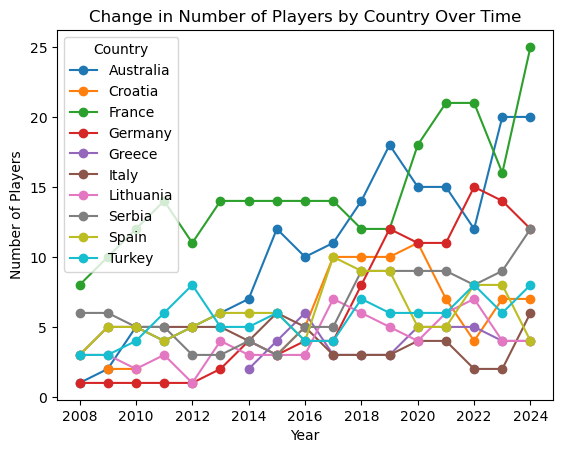

In [56]:
# Plotting:
country_number_active_players_pivot = country_number_active_players_top_ten.pivot(index = "YEAR", columns = "COUNTRY", values = "Number of Players")

country_number_active_players_pivot

import matplotlib.pyplot as plt

# Plotting the line chart
country_number_active_players_pivot.plot(kind='line', marker='o')

# Adding title and labels
plt.title('Change in Number of Players by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Players')

# Show the legend
plt.legend(title='Country')

# Display the plot
plt.show()

In [42]:
country_number_active_players[(country_number_active_players['COUNTRY'] == 'Australia')]

,YEAR,COUNTRY,Number_Players
1,2008,Australia,1
34,2009,Australia,2
70,2010,Australia,5
108,2011,Australia,4
149,2012,Australia,5
190,2013,Australia,6
228,2014,Australia,7
267,2015,Australia,12
305,2016,Australia,10
343,2017,Australia,11


### Visualisation 7: Change in Australian Player Salaries

In [382]:
# Read in salaries for each player
individual_salaries = pd.read_csv("misc_data/nba-salaries.csv")

In [383]:
# Obtain the season as the second year:
aus_player_salaries = aus_player_stats
season_val = '20' + aus_player_salaries['SEASON_ID'].str[-2:]
aus_player_salaries['SEASON_ID'] = season_val
aus_player_salaries = aus_player_salaries.rename(columns={'SEASON_ID': 'YEAR'})
all_player_data = pd.DataFrame(players.get_players())[['id', 'full_name', 'is_active']]

player_salaries = aus_player_salaries.merge(all_player_data, how = 'inner', left_on='PLAYER_ID', right_on='id')[['full_name', 'YEAR', 'is_active']].rename(columns={"full_name":"PLAYER_NAME"})
player_salaries['YEAR'] = player_salaries['YEAR'].astype(int)

In [384]:
player_salaries_final = player_salaries.merge(individual_salaries, left_on=["PLAYER_NAME", "YEAR"], right_on=["name", "season"], how = "inner")[['PLAYER_NAME', 'YEAR', 'salary', 'is_active']].rename(columns = {"salary": "SALARY"})
player_salaries_final.head()

,PLAYER_NAME,YEAR,SALARY,is_active
0,Andrew Bogut,2008,4991520,False
1,Andrew Bogut,2009,6294195,False
2,Andrew Bogut,2010,10000000,False
3,Andrew Bogut,2011,11000000,False
4,Andrew Bogut,2012,12000000,False


In [390]:
average_salaries = pd.read_excel("misc_data/Average_Salary.xlsx")

player_salaries_final = player_salaries_final.merge(average_salaries, on = "YEAR", how = "inner")

In [391]:
# player_salaries_final.to_csv('tab_data/player_salaries.csv')

In [21]:
awards = playerawards.PlayerAwards(player_id=australian_player_ids[0]).get_data_frames()[0]

for id in australian_player_ids[1:]:
    awards = awards.append(playerawards.PlayerAwards(player_id=id).get_data_frames()[0])

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_65798/2636058172.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  awards = awards.append(playerawards.PlayerAwards(player_id=id).get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_65798/2636058172.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  awards = awards.append(playerawards.PlayerAwards(player_id=id).get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_65798/2636058172.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  awards = awards.append(playerawards.PlayerAwards(player_id=id).get_data_frames()[0])
/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_65798/2636058172.py:4: FutureWarnin

In [99]:
# Could look into NBA Awards
awards[(~ awards['DESCRIPTION'].str.contains("Olympic")) & (awards['SEASON'] >= '2005')]

,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM,DESCRIPTION,ALL_NBA_TEAM_NUMBER,SEASON,MONTH,WEEK,CONFERENCE,TYPE,SUBTYPE1,SUBTYPE2,SUBTYPE3
0,101106,Andrew,Bogut,Golden State Warriors,All-Defensive Team,2,2014-15,None,None,1610612744,Award,Kia Motors,KIADT,None
1,101106,Andrew,Bogut,Milwaukee Bucks,All-NBA,3,2009-10,None,None,1610612749,Award,Kia Motors,KIANT,None
2,101106,Andrew,Bogut,Milwaukee Bucks,All-Rookie Team,1,2005-06,None,None,1610612749,Award,Kia Motors,KIART,None
3,101106,Andrew,Bogut,Milwaukee Bucks,NBA Player of the Week,None,2009-10,None,2010-03-15T00:00:00,East,Award,Kia Motors,KIPWK,None
4,101106,Andrew,Bogut,Milwaukee Bucks,NBA Rookie of the Month,None,2005-06,01/01/2006,None,West,Award,Kia Motors,KIRMO,None
7,101106,Andrew,Bogut,Golden State Warriors,NBA Champion,,2014-15,None,None,,Award,Champion,,
2,201988,Patty,Mills,San Antonio Spurs,NBA Champion,,2013-14,None,None,,Award,Champion,,
0,202681,Kyrie,Irving,Cleveland Cavaliers,All-NBA,3,2014-15,None,None,1610612739,Award,Kia Motors,KIANT,None
1,202681,Kyrie,Irving,Boston Celtics,All-NBA,2,2018-19,None,None,East,Award,Kia Motors,KIANT,None
2,202681,Kyrie,Irving,Brooklyn Nets,All-NBA,3,2020-21,None,None,East,Award,Kia Motors,KIANT,None


In [ ]:
awards[(~ awards['DESCRIPTION'].str.contains("Olympic")) & (awards['SEASON'] >= '2005')].shape[0]